# Letter Frequencies in an English Text

Here we will look at an example English text and the frequency distribution for its letters. Then we will look at 2 ciphers, the Caesar and Vigenere Ciphers and see how these can transform the letter frequency distribution. Later, we will look at how we can analyze these distributions to help us decrypt an encrypted message.

The cell below contains some funcitons that will help us along the way such as a function that we can use to plot the frequencies of letters in a given text. We also define what our alphabet here. If you are interested in what the functions are and what they do, there are some comments to help you understand. If not, you may simply run the cell and move down to the next one.

In [55]:
from ipywidgets import interact, fixed
from IPython.display import Image

import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets

%matplotlib inline
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = [15, 6]

alphabet = "ABCDEFGHIJKLMNOPQRSTUVWXYZ"

# normalize_text(txt) returns txt with all its letters
# set to uppercase characters
def normalize_text(txt):
    return txt.upper()

# get_normalized_length(txt) returns the length of
# txt disregarding anything that is not a letter e.g. commas, fullstops etc
def get_normalized_length(txt):
    length = 0
    for x in txt:
        # if x exists in our alphabet, add 1 to the length
        if x in alphabet:
            length += 1
    return length

# create_freq_dictionary(txt) returns a dictionary of 
# letters in our alphabet with the frequency (%) of its
# occurence in txt
# e.g. create_freq_dictionary("Hello World") -> H: 10; D: 10; E: 10; L: 30; O: 20; R: 10; W: 10
def create_freq_dictionary(txt):
    dictionary = {}
    length = get_normalized_length(txt)
    for x in list(alphabet):
        dictionary[x] = (txt.count(x)/length)*100
    return dictionary

# get_frequency_plot(txt) uses create_freq_dictionary(txt) and
# displays a bar chart of the frequency of each letter in the alphabet
# in txt as a percentage
def get_frequency_plot(txt):
    if len(txt) > 0:
        txt = normalize_text(txt)
        test_dict = sorted(create_freq_dictionary(txt).items())
        keys = [item[0] for item in test_dict]
        values = [item[1] for item in test_dict]
        plt.cla()
        plt.title("Frequency Plot of Enlgish Letters")
        plt.bar(range(len(keys)), values, width=0.8, color='c', label="Your Text")
        plt.xticks([i+0.4 for i in range(len(keys))], keys)
        plt.ylabel("Letter Frequency %")
        plt.plot()
    

Take the following text as example and run the cell below to see what the frequency distribution of its letters is:

"Follow. But! Follow only if ye be men of valour, for the entrance to this cave is guarded by a creature so foul, so cruel that no man yet has fought with it and lived! Bones of full fifty men lie strewn about its lair. So, brave knights, if you do doubt your courage or your strength, come no further, for death awaits you all with nasty, big, pointy teeth."

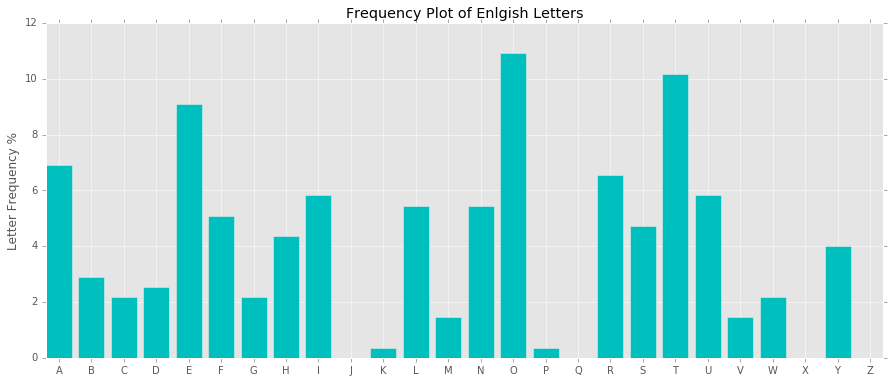

In [109]:
text= "Follow. But! Follow only if ye be men of valour, for the entrance to this cave is guarded by a creature so foul, so cruel that no man yet has fought with it and lived! Bones of full fifty men lie strewn about its lair. So, brave knights, if you do doubt your courage or your strength, come no further, for death awaits you all with nasty, big, pointy teeth."

get_frequency_plot(text)

What's cool is we can compare this to the letter frequency distribution in the English Language. This has luckily already been done and below you will find a representation of the letter freqeuncies in English*. 

*There are a few variations of this distribution that have been produced throughout the years, with slight differnces. But for the purposes of this course we won't worry about that.

<Container object of 26 artists>

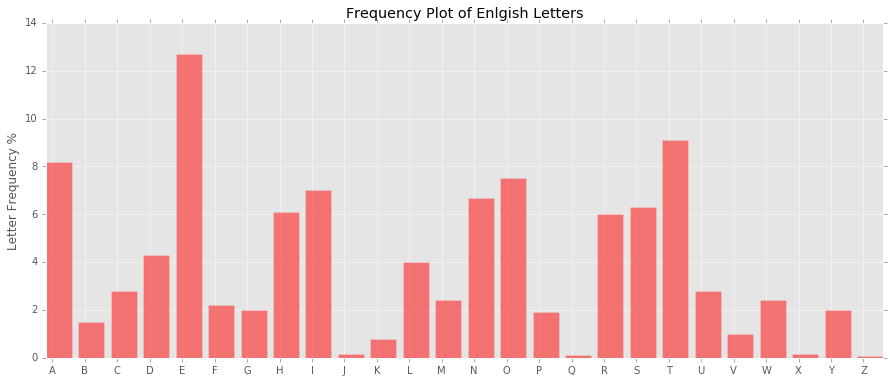

In [66]:
english_letter_frequency = [
    ('A', 8.2), 
    ('B', 1.5), 
    ('C', 2.8), 
    ('D', 4.3), 
    ('E', 12.7), 
    ('F', 2.2), 
    ('G', 2.0), 
    ('H', 6.1), 
    ('I', 7.0),
    ('J', 0.15),
    ('K', 0.8), 
    ('L', 4.0), 
    ('M', 2.4), 
    ('N', 6.7), 
    ('O', 7.5), 
    ('P', 1.9), 
    ('Q', 0.1), 
    ('R', 6.0), 
    ('S', 6.3), 
    ('T', 9.1), 
    ('U', 2.8), 
    ('V', 1.0), 
    ('W', 2.4), 
    ('X', 0.15), 
    ('Y', 2.0), 
    ('Z', 0.07)]

english_letters = [item[0] for item in english_letter_frequency]
letter_frequencies = [item[1] for item in english_letter_frequency]

plt.title("Frequency Plot of Enlgish Letters")
plt.xticks([i+0.4 for i in range(len(english_letters))], english_letters)
plt.ylabel("Letter Frequency %")
plt.bar([i+0.2 for i in range(len(english_letters))], letter_frequencies, width=0.8, alpha=0.5, color='r', label='English Language')

Do you see how the two plots are similar? They are different but they have a similar oveall distribution. This is somthing that will come in handy later. But first lets look at the Caesar Cipher and how it will transform this distribution...

# Caesar and Vigenere Ciphers

## The Caesar Cipher

A cipher is a method of encrypting text to hide the true text from the reader. The Caesar Cipher is a simple substitution cipher, one of the earliest ones actually. The simple idea is that we replace each letter in a text with a letter of a given distance away in an alphabet.

In this exercise we will look at how the Caesar Cipher works and how it changes the frequencies of letters in that text.

The Caesar Cipher takes a text and an integer value that we call the shift. Each letter in the text is then shifted to the right in correspondance to this value. For example, if we were to have a shift of 3, A will become D, B will become E and so on. We loop to the beginning when we reach the end of our alphabet so a shift of 3 would mean X becomes A.

![](./img/caesar.PNG)

Below is a function that does just that and returns you the encrypted text. To make things easier, we first "normalize" the text so that all the letters are now uppercase characters. We do that so that we don't have to worry about finding a match in our alphabet which you can see is all upper case. In reality, though 'a' and 'A' are the same letter to us, this is not the case in terms of code, they both have different values and represent different characters. To avoid this confusion, we make everything upper case. Then, we loop through the text and change each character depending on the shift value. We skip this step for everything that is not a part of our alphabet e.g. punctuations.

In [72]:
#encrypt_caesar(text, shift) takes in a text and shift value
#and returns the text encrypted by this shift
def encrypt_caesar(text, shift):
    result = ""
    #normalize_text(text) returns text with all upper case letters
    text = normalize_text(text)
    
    #loop from i = 0 to i < length of text 
    for i in range(len(text)): 
        #char = character at index i in text
        char = text[i]
        
        #if char appears in our alphabet add the character in the alphabet that corresponds to char + shift
        #while % len(alphabet) ensures we return to the beginning of the alphabet if we exceed it.        
        if char in alphabet:
            result += alphabet[(alphabet.find(char) + shift) % len(alphabet)]
        #else (such as punctuations)
        #keep this as it is for the resulting text
        else:
            result += char
    return result

### To see what that would result in, try changing the text and shift below and run to see what you end up with. The shift should be a value between 0 and 25 (inclusive) if you go over that the shift will loop back to the beginning i.e. 26 will be treated as 0

In [59]:
text="Text to encrypt"
shift=6

print(encrypt_caesar(text, shift))

ZKDZ ZU KTIXEVZ


## Letter Frequencies

Now that we have a Caesar Cipher, we can start analyzing how it transforms the letter frequencies in our text. We Try running the code snippet below and see what happens. You will see a text box and a slider which will allow you to change the text you want to encrypt and the shift value you want to use to encrypt it with. You could also put the first text we looked at to see what happens. It's below if you'd like to try that:

"Follow. But! Follow only if ye be men of valour, for the entrance to this cave is guarded by a creature so foul, so cruel that no man yet has fought with it and lived! Bones of full fifty men lie strewn about its lair. So, brave knights, if you do doubt your courage or your strength, come no further, for death awaits you all with nasty, big, pointy teeth."

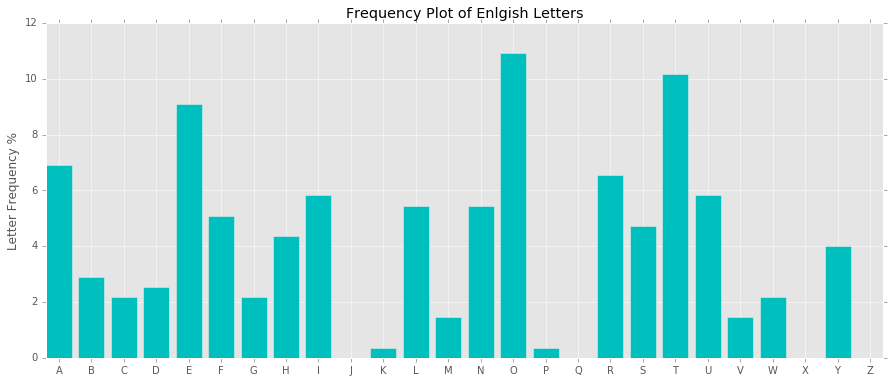

In [62]:
def plot_caesar_encrypted(txt, shift=0):
    get_frequency_plot(encrypt_caesar(txt, shift))
    
interact(plot_caesar_encrypted, txt="Try changing this text", shift=(0,25))

See how the frequency plot slides as you move the slider for the shift? Can you think of how this type of frequency chart might be useful? Before we get into that lets have a look at another type of cipher. This one is calles the Vigenere Cipher. It's quite similar to the Caesar Cipher, but with a twist.

## The Vigenere Cipher

The Vigenere Cipher is also a substitution cipher, but this time it's a 'polyalphabetic' subsitution cipher. In fact, it's no more than multiple interwoven Caesar Ciphers. The way we achieve this is by having a keyword. Each letter in the keyword represents a shift. 'A' would be a shift of 0, 'B'= 1 and so on. So you can think of a Vigenre Cipher with a keyword of 3 letters as 3 intervoven Caesar Ciphers. 

### Example:

Assume we have the following text:<br>
"VIGENERE"

And we have the following keyword:<br>
"KEY"

First, we align the keyword with the text and keep repeating the keyword until we reach the end:
<table style="width:10%">
<tr>
<td>text</td>
<td>VIGENERE</td>
</tr>
<tr>
<td>key</td>
<td>KEYKEYKE</td>
</tr>
</table>

Then, each letter in the keyword defined the Caesar shift for the letter it aligns with in the text. The shift value is the index of the letter in our alphabet. So, A=0, B=1...K=11 ... and so on. Which gives us the following:
<table style="width:20%">
<tr>
<td>text</td>
<td>VIGENERE</td>
</tr>
<tr>
<td>key</td>
<td>KEYKEYKE</td>
</tr>
<tr>
<td>encrypted text</td>
<td>FMEORCBI</td>
</tr>
</table>

You may also notice that a Vigenere Cipher with a key that is a single character is in fact a single Caesar Cipher. If our key were 'A', then we end up with an encrypted text that is the same as the original text :)

Now lets look at how we can implement this chipher. Below you will find 2 functions. One of them (generate_key) generates a key so that whatever you decide your keyword to be, it's repeated until the end of the text you want to encrypt. The other function (encrypt_vigenere) is where we encrypt a text with the Vigenere Cipher.

In [75]:
#generate(text, key) takes in a text and key
#and returns the same key repeated so that it can
#reach the end of the text
def generate_key(text, key): 
    key = list(key) 
    
    #if the text and key are the same length
    # return key without doing anything
    if len(text) == len(key): 
        return key 
    
    #else check if key has at least 1 letter in it and if it
    #does, repeat the key until it reaches the end of the text
    elif len(key) > 0: 
        for i in range(get_normalized_length(text) - len(key)): 
            key.append(key[i % len(key)]) 
    return key

#encrypt_vigenere(text, key) takes in a text and key
#and returns the text encrypted by this key
def encrypt_vigenere(text, key):
    
    #first normalize text and key so that they're all capitalized letters
    text = normalize_text(text)
    key = normalize_text(key)
    
    #generate the key so that it reaches the end of the text
    key = generate_key(text, key)
    cipher_text = [] 
    
    #start with the first letter in the keyword
    key_index = 0;
    #for each letter in the text that exists in the alphabet
    #shift the letter by the index value of the 
    #letter in the keyword its encrypted by
    for char in text:
        if char in alphabet and len(key) > 0:
            x = (alphabet.index(char) + alphabet.index(key[key_index])) % 26
            x += alphabet.index('A') 
            cipher_text.append(alphabet[x]) 
            key_index = key_index + 1
        else:
            cipher_text.append(char)
    cipher_text = ''.join(cipher_text)
    return cipher_text


### Try changing the text and key below and generate your own encrypted message:

In [76]:
text = "Hello World"
key = "key"

print(encrypt_vigenere(text, key))

RIJVS UYVJN


### Letter Frequencies

Now that you know what Caesar and Vigenere Ciphers are. Let's see why looking at the frequency distribution of letters might be interesting. Let's start wit a simple example of a text that we know has been encrypted with a Vigenere Cipher with a key of length 1 and the resulting encrypted text is the following:

"QPEG VJGTG YCU C IKTN PCOGF GVJGN, YJQ YCU C FKUETGVG OCVJU YKB CV DTKUVQN. VJGP JGT RTQHGUUQT FGEKFGF JGT PCOG YCU CP QNF NCFA'U PCOG CPF OCFG HWP QH JGT GXGTA NGEVWTG"

Now what if we were to want to decrypt this message? Let's start with looking at the frequency distribution of letters in this encrypted message first:

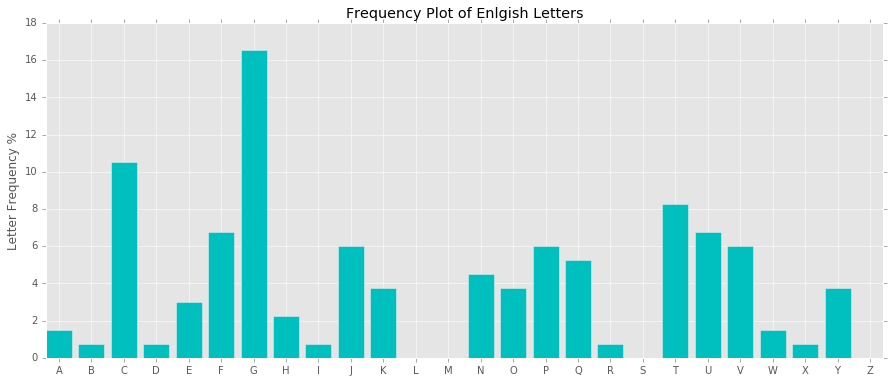

In [85]:
cipher_text = "QPEG VJGTG YCU C IKTN PCOGF GVJGN, YJQ YCU C FKUETGVG OCVJU YKB CV DTKUVQN. VJGP JGT RTQHGUUQT FGEKFGF JGT PCOG YCU CP QNF NCFA'U PCOG CPF OCFG HWP QH JGT GXGTA NGEVWTG"

get_frequency_plot(cipher_text)


The intersting thing about looking at the frequency distribution of letters is that it may help us understand what letter (or letters) was used to encrypt the message. The simple method behind this is comparing the frequency distribution in the encrypted text to (in our case) the distribution of letters in the English Language that we previously looked at.

Given the frequency plot of our encrypted text and that of what we would expect in English, we can then go on to compare these to and try figure out what letter might have been used to encrypt our text. To do this, below you will now find a decrypt_vigenere method. This method takes in a text and a keyword and produces the decrypted text. This is simply done by doing the reverse of what the key would have done if it were encrypting the message. For example, if our keyword were 'B', the encryption would have shifted each letter _forward_ by 1, so the decrypt_vigenre method would shift each letter _backwards_ by 1.

In [105]:
#decrytp_vigenre(encryted_text, keyword) takes an encryted text and keyword
#and returns a decrypted text by reverse applying the vigenere cipher
def decrytp_vigenre(encryted_text, keyword):
    result = ""
    #normalize encryted_text  an keyword so that they're all capitals
    encryted_text = normalize_text(encryted_text)
    keyword = normalize_text(keyword)
    
    #generate_key so that keyword can reach the end of encrypted_text
    keyword = generate_key(encryted_text, keyword)

    #start with the first letter in the keyword
    key_index = 0
    
    #for each letter in the encrypted text, shift it BACK according the letter in the 
    #keyword it's encryped by
    for char in encryted_text: 
        
        #to ensure we keep punctuation and scpaces as is
        #if the letter does not exist in the alphabet, add it to the result
        if char not in alphabet:
            result += char
        elif len(keyword) > 0:
            result += alphabet[(alphabet.index(char) - alphabet.index(keyword[key_index]) + 26) % 26 + alphabet.index('A')]
            key_index = key_index + 1
    return result

### Now try see if you can find what letter was used to encrypt the text. Run the cell below and you will get 2 ovdrlaying plots. You should try to find the letter that makes the texts frequency plot best match the English Language plot

<function __main__.plot_vigenre_decrypted>

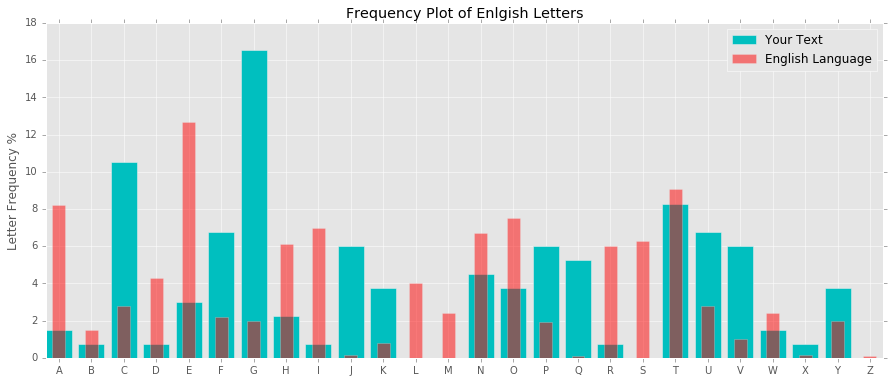

In [106]:
def plot_vigenre_decrypted(cipher_text, key):
    get_frequency_plot(decrytp_vigenre(cipher_text, key))
    plt.bar([i+0.2 for i in range(len(english_letters))], letter_frequencies, width=0.4, alpha=0.5, color='r', label='English Language')
    plt.legend()
    
interact(plot_vigenre_decrypted, cipher_text=fixed(cipher_text), key=['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J',
                                                         'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W',
                                                         'X', 'Y', 'Z'])

### Once you've found the letter that looks like the best  candidate, you can change the key below and run the cell. You'll see what the encrypted message was if you got it right :) It's currently set to 'A' which is a shift of 0.

In [107]:
key='C'
print(decrytp_vigenre(cipher_text, key))

ONCE THERE WAS A GIRL NAMED ETHEL, WHO WAS A DISCRETE MATHS WIZ AT BRISTOL. THEN HER PROFESSOR DECIDED HER NAME WAS AN OLD LADY'S NAME AND MADE FUN OF HER EVERY LECTURE


## Frequency Analysis for Keywords with Length > 1

This is where it get's a bit tricker. So far we've seen how we can use frequency analysis to help us decrypt a message. However the example we looked at was relatively simple because the keyword was only of length 1, which we know is basically the same as using the Caesar Cipher. Now what if we used the Vigenere Cipher with a keyword with length larger than 1? In this case, we can still use the same frequency analysis once we know what the length of the keyword is. For now, we will skip the part where we find the length of the keyword (which can be done with the Kasiski Method) and go right to what we would do once we do know the length. 

If we were to know that the keyword has a length of 3, we know that every letter in the text 3 letters apart from eachother has been encrypted with the same letter! Have a look at the example below

<table style="width:10%">
<tr>
<td>text</td>
<td>H</td>
<td>E</td>
<td>L</td>
<td>L</td>
<td>O</td>
<td>W</td>
<td>O</td>
<td>R</td>
<td>L</td>
<td>D</td>
</tr>
<tr>
<td>key</td>
<td>K</td>
<td>E</td>
<td>Y</td>
<td>K</td>
<td>E</td>
<td>Y</td>
<td>K</td>
<td>E</td>
<td>Y</td>
<td>K</td>
</tr>
</table>

So we know which letters in the text will be encrypted by which letter in the keyword:

<table style="width:10%">
<tr>
<td>text</td>
<td>H</td>
<td>L</td>
<td>O</td>
<td>D</td>
</tr>
<tr>
<td>key</td>
<td>K</td>
<td>K</td>
<td>K</td>
<td>K</td>
</tr>
</table>

<table style="width:10%">
<tr>
<td>text</td>
<td>E</td>
<td>O</td>
<td>R</td>
</tr>
<tr>
<td>key</td>
<td>E</td>
<td>E</td>
<td>E</td>
</tr>
</table>

<table style="width:10%">
<tr>
<td>text</td>
<td>L</td>
<td>W</td>
<td>L</td>
</tr>
<tr>
<td>key</td>
<td>Y</td>
<td>Y</td>
<td>Y</td>
</tr>
</table>

So this means that each of these subsets of text will be encrypted by again, a single letter keyword, or a Caesar Cipher. So, using the same idea, given an encrypted message and the length of the keyword, we can use each _subset_ of the encrypted text to analyze a number of frequency distributions. Each will alow us to find the letter at the given index of the keyword. Take the text below for example. We know that it's been encrypted using a keyword of length 3:

KPJ MLGVHPOR, CHGCZX MXI, EBSU ET. RRIW CSMX OLYA RRER DLCI AGVP EBSU ET, YXH RRI UKC UORBI OLOA UKW RRMQ. YRC NEW GLCX WFO AYC XUY CCKVQ YPB CLC GEQ ZPYIMLQ ML K KYBHCX, ELN WFO TJEGIOH YXSRRIP PPMGIP KRB BEL GMRR MR DS FOV KYXFOV. G CYNZSQO WFO QSCX FKZC VSMUIB BERRIP NIJSKFDJSV, JMB QPC. HYBPGXK NEX FOV FKRB DS FOV FOEPD ELN GPSIB, “YL, URC AKR'R ISS BIKKML VMIO XFSW DYV CFIP!” DLGC AYC EJV XFKX NKWQOH ZOXUOIL DLCW SL DLC CYZTIAD, FSD LCXGCPSPDL UORBI OLOA RRER CLC WYQD KPYA SZ. CME EJGEWC OLYA YPXCB CME EPO XUY. XUY MQ DLC LIESRLSRE YJ RRI CXH.

The text which was encrypted with the first letter in the key would be:

KMVOHZXBERCXYRDIVBEXRKOIOKRYNGXOCYKYCGZIQKBXNOEOXRPGKBGRDOYOCZOOCKVUBRNSDVBCBXEOKDOODNSYRKIBKVOSYFDCCV
KKOOODWDCTDDXPDOIORCWDYZEGCYPBEOYYDLSSYRX

Below you will find 3 code blocks. Each will allow you to plot the frequency of letters that were in turn encrypted byt the 1st, 2nd and 3rd letter in the key. You can use these again against the English Language letter frequency plot to try find the letter that was used at each index of the keyword

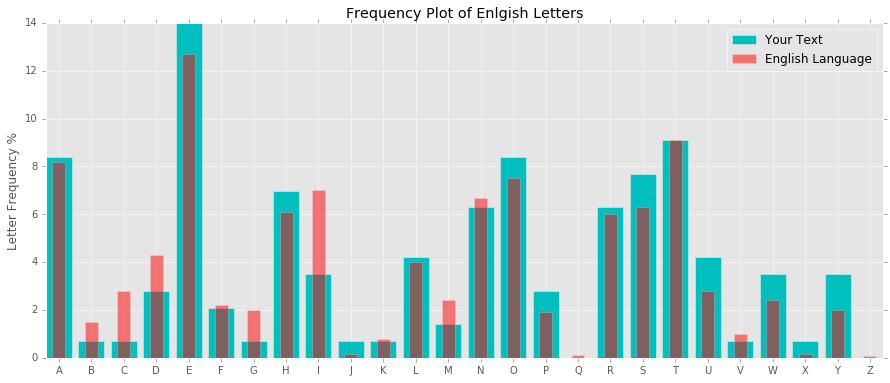

In [108]:
story = "KPJ MLGVHPOR, CHGCZX MXI, EBSU ET. RRIW CSMX OLYA RRER DLCI AGVP EBSU ET, YXH RRI UKC UORBI OLOA UKW RRMQ. YRC NEW GLCX WFO AYC XUY CCKVQ YPB CLC GEQ ZPYIMLQ ML K KYBHCX, ELN WFO TJEGIOH YXSRRIP PPMGIP KRB BEL GMRR MR DS FOV KYXFOV. G CYNZSQO WFO QSCX FKZC VSMUIB BERRIP NIJSKFDJSV, JMB QPC. HYBPGXK NEX FOV FKRB DS FOV FOEPD ELN GPSIB, “YL, URC AKR'R ISS BIKKML VMIO XFSW DYV CFIP!” DLGC AYC EJV XFKX NKWQOH ZOXUOIL DLCW SL DLC CYZTIAD, FSD LCXGCPSPDL UORBI OLOA RRER CLC WYQD KPYA SZ. CME EJGEWC OLYA YPXCB CME EPO XUY. XUY MQ DLC LIESRLSRE YJ RRI CXH."

#encrypted_with_key(text, key_index, key_length=3) takes in a text an index and a key_length 
#and returns the subtext that is encrypted by that index in the keyword
def encrypted_with_key(text, key_index, key_length=3):
    result = ""
    index = 0
    for i in range(len(text)):
        if alphabet.count(text[i]) == 1:
            if index%key_length == key_index%key_length:
                result += text[i]
            index += 1
    return result

def plot_vigenre_decrypted_key_at_index(cipher_text, key_index, key):
    text_at_index = encrypted_with_key(story, key_index)
    get_frequency_plot(decrytp_vigenre(text_at_index, key))
    plt.bar([i+0.2 for i in range(len(english_letters))], letter_frequencies, width=0.4, alpha=0.5, color='r', label='English Language')
    plt.legend()
    
interact(plot_vigenre_decrypted_key_at_index, cipher_text=fixed(story), key_index=fixed(0), key=['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J',
                                                         'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W',
                                                         'X', 'Y', 'Z'])


<function __main__.plot_vigenre_decrypted_key_at_index>

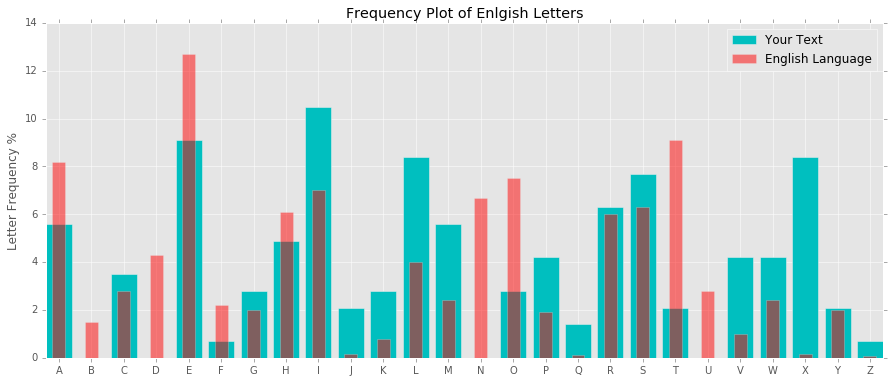

In [16]:
interact(plot_vigenre_decrypted_key_at_index, cipher_text=fixed(story), key_index=fixed(1), key=['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J',
                                                         'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W',
                                                         'X', 'Y', 'Z'])

<function __main__.plot_vigenre_decrypted_key_at_index>

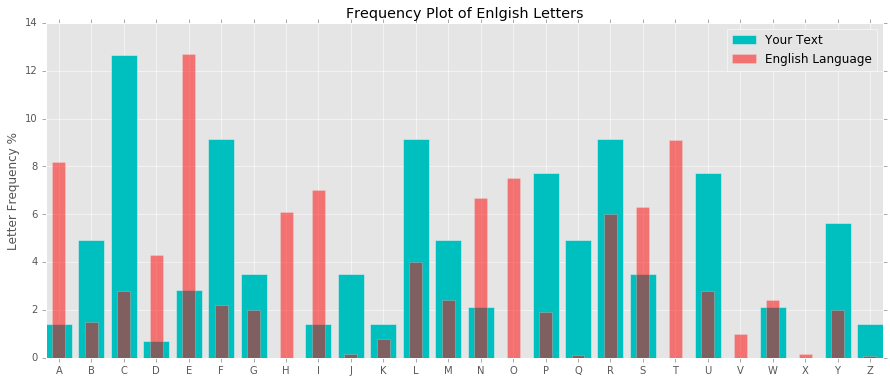

In [17]:
interact(plot_vigenre_decrypted_key_at_index, cipher_text=fixed(story), key_index=fixed(2), key=['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J',
                                                         'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W',
                                                         'X', 'Y', 'Z'])

### Once you think you've found each letter of the 3 letter keyword, try changing the key below and decrypt the message :)

In [197]:
key="key"

print(decrytp_vigenre(story, key))

ALL CHILDREN, EXCEPT ONE, GROW UP. THEY SOON KNOW THAT THEY WILL GROW UP, AND THE WAY WENDY KNEW WAS THIS. ONE DAY WHEN SHE WAS TWO YEARS OLD SHE WAS PLAYING IN A GARDEN, AND SHE PLUCKED ANOTHER FLOWER AND RAN WITH IT TO HER MOTHER. I SUPPOSE SHE MUST HAVE LOOKED RATHER DELIGHTFUL, FOR MRS. DARLING PUT HER HAND TO HER HEART AND CRIED, “OH, WHY CAN'T YOU REMAIN LIKE THIS FOR EVER!” THIS WAS ALL THAT PASSED BETWEEN THEM ON THE SUBJECT, BUT HENCEFORTH WENDY KNEW THAT SHE MUST GROW UP. YOU ALWAYS KNOW AFTER YOU ARE TWO. TWO IS THE BEGINNING OF THE END.
